In [1]:
import sys
sys.path.insert(1, r"/vol/bitbucket/mjh24/IAEA-thesis")
from Stage1.GAT.GATModel import GraphAttentionNetwork
import torch
from Stage2.txtGraphExtraction.extract_mini_txt_graphs_helper import main as txtExtractor
from Stage1.tree_helpers import normalise_text
from pathlib import Path
import numpy as np
import json
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
REMOVE_DUPES = False

/vol/bitbucket/mjh24/IAEA-thesis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Load model
# model = GraphAttentionNetwork(in_dim = 119, edge_in_dim = 210, edge_emb_dim = 32, hidden1 = 32, hidden2 = 32, hidden3 = 8, heads = 2)
# state_dict = torch.load("/vol/bitbucket/mjh24/IAEA-thesis/Stage1/GAT/LONG80EPOCH-75f1-newlabelnotitle.pt", map_location=torch.device(device))
model = GraphAttentionNetwork(in_dim = 119, pe_dim=11, edge_in_dim = 210, edge_emb_dim = 32, heads = 4)
state_dict = torch.load("/vol/bitbucket/mjh24/IAEA-thesis/TrueTransformer-newtagsnotitle.pt", map_location=torch.device(device))
model.load_state_dict(state_dict, strict=False)
model.to(device)

GraphAttentionNetwork(
  (pe_lin): Linear(in_features=18, out_features=11, bias=True)
  (pe_norm): BatchNorm1d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (convs): ModuleList(
    (0-5): 6 x GPSConv(112, conv=GINEConv(nn=Sequential(
      (0): Linear(in_features=112, out_features=112, bias=True)
      (1): ReLU()
      (2): Linear(in_features=112, out_features=112, bias=True)
    )), heads=4, attn_type=multihead)
  )
  (edge_mlp): Sequential(
    (0): Linear(in_features=256, out_features=112, bias=True)
    (1): ReLU()
    (2): Linear(in_features=112, out_features=1, bias=True)
  )
  (title_head): Sequential(
    (0): Linear(in_features=112, out_features=112, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=112, out_features=1, bias=True)
  )
)

In [ ]:
SRC_FOLDER = Path("/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)")
SRC_GRAPHS = Path("/vol/bitbucket/mjh24/IAEA-thesis/data/allmovie")

html_files = sorted(list(SRC_FOLDER.rglob("*.htm")), key=lambda p: str(p)[-8:-4])
graph_folders = sorted([f for f in SRC_GRAPHS.iterdir() if f.is_dir()], key=lambda p: str(p)[-4:])
print(html_files)
print(graph_folders)
for file, graph in zip(html_files, graph_folders):
    sorted_label_index_extracted, xpaths_extracted, txts_extracted, probs_extracted, title_label, title_txt, title_xpaths, title_probs = txtExtractor(str(file), model, alreadyConvertedToGraph=str(graph), remove_dupes=REMOVE_DUPES)
    np.save(graph/"sorted_label_index.npy",sorted_label_index_extracted)
    np.save(graph/"xpaths.npy",xpaths_extracted)
    np.save(graph/"txts.npy",txts_extracted)
    np.save(graph/"probs.npy",probs_extracted)
    np.save(graph/"title_label.npy",title_label)
    np.save(graph/"title_txt.npy",title_txt)
    np.save(graph/"title_probs.npy",title_probs)
    print("saved: ", graph)

[PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0000.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0001.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0002.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0003.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0004.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0005.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0006.htm'), PosixPath('/vol/bitbucket/mjh24/IAEA-thesis/data/swde/sourceCode/sourceCode/movie/movie/movie-allmovie(2000)/0007.htm'), PosixPath('/vol/bitbucket/mjh24

: 

In [ ]:
SRC_GRAPHS = Path("/vol/bitbucket/mjh24/IAEA-thesis/data/allmovie")

graph_folders = sorted([f for f in SRC_GRAPHS.iterdir() if f.is_dir()], key=lambda p: str(p)[-4:])
txt_edges = {}
for graph in graph_folders:
    website = str(graph)[-4:] + ".htm"
    loadedtxts = np.load(graph/"txts.npy")
    txt_edges[website] = loadedtxts
    print("Loaded: ", graph)

Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0000
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0001
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0002
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0003
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0004
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0005
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0006
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0007
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0008
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0009
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0010
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0011
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0012
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0013
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0014
Loaded:  /vol/bitbucket/mjh24/IAEA-thesis/data/allmovie/0015
Loaded:  /vol/bitbucket/

In [ ]:
SRC_GRAPHS = Path("/vol/bitbucket/mjh24/IAEA-thesis/data/allmovie")
with open("/vol/bitbucket/mjh24/IAEA-thesis/data/swde_expanded_dataset/dataset/movie/movie-allmovie(2000).json") as f:
    labels = json.load(f)

graph_folders = sorted([f for f in SRC_GRAPHS.iterdir() if f.is_dir()], key=lambda p: str(p)[-4:])
folder_map = {str(f)[-4:] + ".htm": f for f in graph_folders}

results = {}
list_of_k = []

# assume `data` is the JSON you loaded with json.load(file)
for parent_key, attributes in labels.items():
    edges = np.load(folder_map[parent_key]/"txts.npy")
    print("Loaded: ", parent_key)
    
    results[parent_key] = {}

    for attr_key, values in attributes.items():
        attr_key = attr_key.split("|")[-1].strip()
        for value in values:
            count = 0
            found = False
            for src, tgt in edges:
                if value == tgt or (len(value) > 3 and normalise_text(value) in normalise_text(tgt)):
                    count += 1
                    if normalise_text(attr_key) in normalise_text(src):
                        found = True
                        break
            if found:
                results[parent_key][(attr_key, value)] = count
                list_of_k.append(count)
            else:
                print((attr_key, value), "not found")
                results[parent_key][(attr_key, value)] = -1
                list_of_k.append(-1)

Loaded:  0000.htm
('topic_entity_name', 'The Sweet Hereafter') not found
Loaded:  0001.htm
('topic_entity_name', 'Breaking the Waves') not found
Loaded:  0002.htm
('topic_entity_name', 'Dead Man Walking') not found
Loaded:  0003.htm
('topic_entity_name', 'Red') not found
Loaded:  0004.htm
('topic_entity_name', 'Chungking Express') not found
Loaded:  0005.htm
('topic_entity_name', 'Short Cuts') not found
Loaded:  0006.htm
('topic_entity_name', 'The Remains of the Day') not found
Loaded:  0007.htm
('Is related to:', 'Utu') not found
('topic_entity_name', 'The Piano') not found
Loaded:  0008.htm
('topic_entity_name', 'Belle de Jour') not found
Loaded:  0009.htm
('topic_entity_name', 'sex, lies, and videotape') not found
Loaded:  0010.htm
('topic_entity_name', 'The World of Apu') not found
Loaded:  0011.htm
('topic_entity_name', 'A Woman Under the Influence') not found
Loaded:  0012.htm
('topic_entity_name', 'Taxi Driver') not found
Loaded:  0013.htm
('topic_entity_name', 'A Streetcar Name

In [ ]:
json_ready = {
    parent: {f"{k[0]} || {k[1]}": v for k, v in kvs.items()}
    for parent, kvs in results.items()
}

# with open("./results.json", "w") as f: commenting out so cannot accidentally be overwritten
#     json.dump(json_ready, f, indent=4)


In [18]:
with open("./results.json", "r") as f:
    results = json.load(f)

/tmp/ipykernel_195401/1311828100.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(distributions, labels=[str(k) for k in ks], showmeans=True)


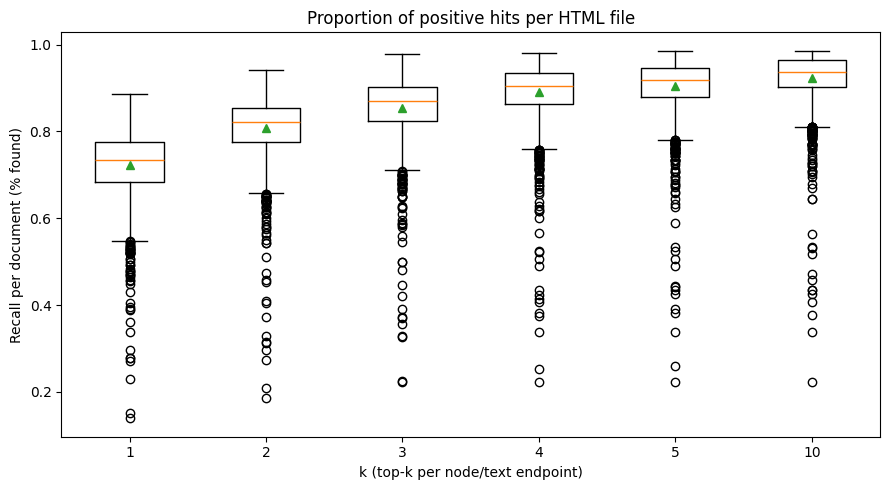

In [ ]:
# Count the % correct in a document for the 2000 documents (Recall per document)
distributions = []
ks = [1,2,3,4,5,10]
for k in ks:
    percentages = []
    for parent_key, kv_pairs in results.items():
        counts = kv_pairs.values()  # all the count numbers for this page
        total = len(counts)
        if total == 0:
            percentages.append(0.0)  # avoid division by zero
            continue

        # how many counts are in [0, 5]
        correct = sum(1 for c in counts if 0 < c <= k)

        # percentage for this page
        percentages.append(correct / total)
    
    distributions.append(percentages)


plt.figure(figsize=(9, 5))
plt.boxplot(distributions, labels=[str(k) for k in ks], showmeans=True)
plt.xlabel("k (top-k per node/text endpoint)")
plt.ylabel(r"Recall per document (% found)")
plt.title("Proportion of positive hits per HTML file")
plt.tight_layout()
plt.show()

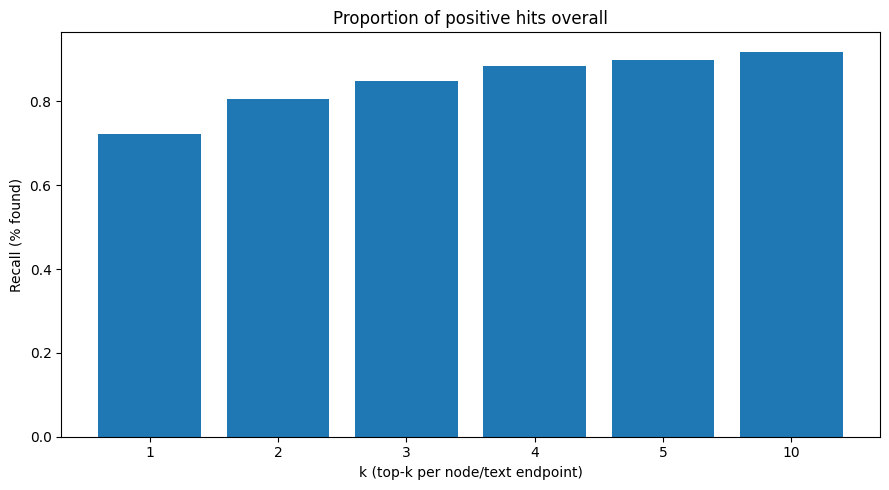

In [ ]:
# Number of hits in k for all 2000*200 edges

all_counts = []
bars = []

for kv_pairs in results.values():
    for c in kv_pairs.values():
        all_counts.append(c)
for k in ks:
    hits = sum(1 for c in all_counts if 0 < c <= k)
    proportion = hits / len(all_counts)
    bars.append(proportion)

plt.figure(figsize=(9, 5))
plt.bar([str(k) for k in ks], bars)
plt.xlabel("k (top-k per node/text endpoint)")
plt.ylabel(r"Recall (% found)")
plt.title("Proportion of positive hits overall")
plt.tight_layout()
plt.show()

In [ ]:
#Get the top k edges per node. Then test the prospective edges 1=edge can be found. 2=edge cannot be found. Therefore this gives n F1 score that can be used. 
TP = sum(1 for c in all_counts if 0 < c <= 1)
FN = sum(1 for c in all_counts if c > 1) # Ignoring not found as will be skewed by "topic_entity"

SRC_GRAPHS = Path("/vol/bitbucket/mjh24/IAEA-thesis/data/allmovie")
with open("/vol/bitbucket/mjh24/IAEA-thesis/data/swde_expanded_dataset/dataset/movie/movie-allmovie(2000).json") as f:
    labels = json.load(f)

graph_folders = sorted([f for f in SRC_GRAPHS.iterdir() if f.is_dir()], key=lambda p: str(p)[-4:])
folder_map = {str(f)[-4:] + ".htm": f for f in graph_folders}

FP = 0
TN = 0

for parent_key, attributes in labels.items():
    graph = folder_map[parent_key]
    edges = np.load(graph / "txts.npy")
    print("Loaded: ", parent_key)

    # Build a reverse lookup: value -> correct keys
    value_to_keys = {}
    for k, vals in attributes.items():
        for v in vals:
            value_to_keys.setdefault(v, set()).add(normalise_text(k))

    seen_right = set()

    for src, tgt in edges:
        # correct keys for this tgt (empty if tgt not in labels)
        correct_keys = value_to_keys.get(tgt, set())

        if tgt in value_to_keys and tgt not in seen_right:
            seen_right.add(tgt)
            # FP if left side is not the exact correct key
            if normalise_text(src) not in correct_keys:
                FP += 1
        else:
            # subsequent times → TN 
            if tgt in value_to_keys and normalise_text(src) not in correct_keys:
                TN += 1
                
print(TP, TN, FP, FN)

Loaded:  0000.htm
Loaded:  0001.htm
Loaded:  0002.htm
Loaded:  0003.htm
Loaded:  0004.htm
Loaded:  0005.htm
Loaded:  0006.htm
Loaded:  0007.htm
Loaded:  0008.htm
Loaded:  0009.htm
Loaded:  0010.htm
Loaded:  0011.htm
Loaded:  0012.htm
Loaded:  0013.htm
Loaded:  0014.htm
Loaded:  0015.htm
Loaded:  0016.htm
Loaded:  0017.htm
Loaded:  0018.htm
Loaded:  0019.htm
Loaded:  0020.htm
Loaded:  0021.htm
Loaded:  0022.htm
Loaded:  0023.htm
Loaded:  0024.htm
Loaded:  0025.htm
Loaded:  0026.htm
Loaded:  0027.htm
Loaded:  0028.htm
Loaded:  0029.htm
Loaded:  0030.htm
Loaded:  0031.htm
Loaded:  0032.htm
Loaded:  0033.htm
Loaded:  0034.htm
Loaded:  0035.htm
Loaded:  0036.htm
Loaded:  0037.htm
Loaded:  0038.htm
Loaded:  0039.htm
Loaded:  0040.htm
Loaded:  0041.htm
Loaded:  0042.htm
Loaded:  0043.htm
Loaded:  0044.htm
Loaded:  0045.htm
Loaded:  0046.htm
Loaded:  0047.htm
Loaded:  0048.htm
Loaded:  0049.htm
Loaded:  0050.htm
Loaded:  0051.htm
Loaded:  0052.htm
Loaded:  0053.htm
Loaded:  0054.htm
Loaded:  0

In [ ]:
print("Precision: ", TP/(TP+FP))
print("Recall: ", TP/(TP+FN))
print("Accuracy: ", (TP+TN)/(TP+FN+TN+FP)) #TN is large. Massive class imbalance makes this look much better than it is
print("F1: ", 2*(TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FP))+(TP/(TP+FN))))

Precision:  0.807973551948587
Recall:  0.7364009274121633
Accuracy:  0.9950741995666535
F1:  0.7705287557273277


In [21]:
# This is the same as above, but the FP are not restricted to those values we expect to see. They are ALL the positive edges the model predicts BUT note that this is before pruning
TP = sum(1 for c in all_counts if 0 < c <= 1)
FN = sum(1 for c in all_counts if c > 1) # Ignoring not found as will be skewed by "topic_entity"

SRC_GRAPHS = Path("/vol/bitbucket/mjh24/IAEA-thesis/data/allmovie")
with open("/vol/bitbucket/mjh24/IAEA-thesis/data/swde_expanded_dataset/dataset/movie/movie-allmovie(2000).json") as f:
    labels = json.load(f)

graph_folders = sorted([f for f in SRC_GRAPHS.iterdir() if f.is_dir()], key=lambda p: str(p)[-4:])
folder_map = {str(f)[-4:] + ".htm": f for f in graph_folders}

FP = 0
TN = 0

for parent_key, attributes in labels.items():
    graph = folder_map[parent_key]
    edges = np.load(graph / "txts.npy")
    print("Loaded: ", parent_key)

    # Build a reverse lookup: value -> correct keys
    value_to_keys = {}
    for k, vals in attributes.items():
        for v in vals:
            value_to_keys.setdefault(v, set()).add(normalise_text(k))

    seen_right = set()

    for src, tgt in edges:
        # correct keys for this tgt (empty if tgt not in labels)
        correct_keys = value_to_keys.get(tgt, set())

        if tgt not in seen_right:
            seen_right.add(tgt)
            # FP if left side is not the exact correct key
            if normalise_text(src) not in correct_keys:
                FP += 1
        else:
            # subsequent times → TN 
            if tgt in value_to_keys and normalise_text(src) not in correct_keys:
                TN += 1
                
print(TP, TN, FP, FN)

Loaded:  0000.htm
Loaded:  0001.htm
Loaded:  0002.htm
Loaded:  0003.htm
Loaded:  0004.htm
Loaded:  0005.htm
Loaded:  0006.htm
Loaded:  0007.htm
Loaded:  0008.htm
Loaded:  0009.htm
Loaded:  0010.htm
Loaded:  0011.htm
Loaded:  0012.htm
Loaded:  0013.htm
Loaded:  0014.htm
Loaded:  0015.htm
Loaded:  0016.htm
Loaded:  0017.htm
Loaded:  0018.htm
Loaded:  0019.htm
Loaded:  0020.htm
Loaded:  0021.htm
Loaded:  0022.htm
Loaded:  0023.htm
Loaded:  0024.htm
Loaded:  0025.htm
Loaded:  0026.htm
Loaded:  0027.htm
Loaded:  0028.htm
Loaded:  0029.htm
Loaded:  0030.htm
Loaded:  0031.htm
Loaded:  0032.htm
Loaded:  0033.htm
Loaded:  0034.htm
Loaded:  0035.htm
Loaded:  0036.htm
Loaded:  0037.htm
Loaded:  0038.htm
Loaded:  0039.htm
Loaded:  0040.htm
Loaded:  0041.htm
Loaded:  0042.htm
Loaded:  0043.htm
Loaded:  0044.htm
Loaded:  0045.htm
Loaded:  0046.htm
Loaded:  0047.htm
Loaded:  0048.htm
Loaded:  0049.htm
Loaded:  0050.htm
Loaded:  0051.htm
Loaded:  0052.htm
Loaded:  0053.htm
Loaded:  0054.htm
Loaded:  0

In [22]:
print("Precision: ", TP/(TP+FP))
print("Recall: ", TP/(TP+FN))
print("Accuracy: ", (TP+TN)/(TP+FN+TN+FP)) #TN is large. Massive class imbalance makes this look much better than it is
print("F1: ", 2*(TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FP))+(TP/(TP+FN))))

Precision:  0.3462412668429113
Recall:  0.7364009274121633
Accuracy:  0.9816746791196899
F1:  0.47101875645428565


In [32]:
# If the top predicted edge is assumed to be the positive prediction, and all others are negative, then we can get an edge-by-edge recall=precision=F1 score. This is because there is only one true edge per item, therefore: incorrect = FN=FP=1 → F1 reduces to accuracy.
per_category_scores = {}
for parent_key, kv_pairs in results.items():
    for kv_pair, k_hit in kv_pairs.items():
        key, value = kv_pair.split(" || ")
        
        if key not in per_category_scores:
            per_category_scores[key] = [0,0,0] # TP, FP, FN

        if k_hit == 1:
            per_category_scores[key][0] += 1
        else:
            per_category_scores[key][2] += 1

for parent_key, attributes in labels.items():
    graph = folder_map[parent_key]
    edges = np.load(graph / "txts.npy")
    print("Loaded: ", parent_key)

    # Build a reverse lookup: value -> correct keys
    value_to_keys = {}
    for k, vals in attributes.items():
        for v in vals:
            value_to_keys.setdefault(v, set()).add(normalise_text(k))

    seen_right = set()

    for src, tgt in edges:
        # correct keys for this tgt (empty if tgt not in labels)
        correct_keys = value_to_keys.get(tgt, set())

        if tgt in value_to_keys and tgt not in seen_right:
            seen_right.add(tgt)
            # FP if left side is not the exact correct key
            if normalise_text(src) not in correct_keys:
                if src in per_category_scores:
                    per_category_scores[src][1] += 1

Loaded:  0000.htm
Loaded:  0001.htm
Loaded:  0002.htm
Loaded:  0003.htm
Loaded:  0004.htm
Loaded:  0005.htm
Loaded:  0006.htm
Loaded:  0007.htm
Loaded:  0008.htm
Loaded:  0009.htm
Loaded:  0010.htm
Loaded:  0011.htm
Loaded:  0012.htm
Loaded:  0013.htm
Loaded:  0014.htm
Loaded:  0015.htm
Loaded:  0016.htm
Loaded:  0017.htm
Loaded:  0018.htm
Loaded:  0019.htm
Loaded:  0020.htm
Loaded:  0021.htm
Loaded:  0022.htm
Loaded:  0023.htm
Loaded:  0024.htm
Loaded:  0025.htm
Loaded:  0026.htm
Loaded:  0027.htm
Loaded:  0028.htm
Loaded:  0029.htm
Loaded:  0030.htm
Loaded:  0031.htm
Loaded:  0032.htm
Loaded:  0033.htm
Loaded:  0034.htm
Loaded:  0035.htm
Loaded:  0036.htm
Loaded:  0037.htm
Loaded:  0038.htm
Loaded:  0039.htm
Loaded:  0040.htm
Loaded:  0041.htm
Loaded:  0042.htm
Loaded:  0043.htm
Loaded:  0044.htm
Loaded:  0045.htm
Loaded:  0046.htm
Loaded:  0047.htm
Loaded:  0048.htm
Loaded:  0049.htm
Loaded:  0050.htm
Loaded:  0051.htm
Loaded:  0052.htm
Loaded:  0053.htm
Loaded:  0054.htm
Loaded:  0

In [33]:
output = []
for k, v in per_category_scores.items():
    TP, FP, FN = v
    if TP == 0:
        print("No matches for: ", k, v)
        pr,re,f1=0,0,0
    else:
        pr, re, f1 = TP/(TP+FP), TP/(TP+FN), 2*(TP/(TP+FP))*(TP/(TP+FN))/((TP/(TP+FP))+(TP/(TP+FN)))
    output.append([k, pr, re, f1])

output = sorted(output, key=lambda p: (p[-1], sum(p[-3:])))[::-1]

for k, pr, re, f1 in output:
    print(k, end=", ")
    print("Precision: ", pr, end=", ")
    print("Recall: ", re, end=", ")
    print("F1: ", f1)

No matches for:  Color Type [0, 0, 1999]
No matches for:  Countries [0, 17, 2529]
No matches for:  Run Time [0, 0, 1999]
No matches for:  topic_entity_name [0, 0, 2000]
No matches for:  Is featured in: [0, 0, 156]
No matches for:  Is preceded by: [0, 0, 115]
No matches for:  Influenced: [0, 0, 190]
No matches for:  Is followed by: [0, 0, 325]
No matches for:  Features: [0, 0, 47]
No matches for:  Is spoofed in: [0, 0, 154]
No matches for:  Has been remade as: [0, 0, 185]
No matches for:  Is a version of: [0, 0, 76]
No matches for:  Is influenced by: [0, 0, 23]
No matches for:  Is re-edited from: [0, 0, 12]
No matches for:  Has been re-edited into: [0, 0, 16]
No matches for:  Is a spoof of: [0, 0, 42]
No matches for:  Includes: [0, 0, 7]
No matches for:  From poem [0, 0, 1]
From cartoon, Precision:  1.0, Recall:  1.0, F1:  1.0
From Opera, Precision:  1.0, Recall:  1.0, F1:  1.0
From Comic by, Precision:  1.0, Recall:  1.0, F1:  1.0
From, Precision:  1.0, Recall:  1.0, F1:  1.0
From poem